## Random_Forest

In [27]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [28]:
df = pd.read_csv("../2_data/X_train.csv")

# Load the dataset

# Read the dataset from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 83)
X_test shape: (1409, 83)
y_train shape: (5634,)
y_test shape: (1409,)


In [29]:
# Print the columns of the dataframe
print(X_train.columns.tolist())


['Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Partner', 'Tenure', 'Monthly Charges', 'Country_United States', 'State_California', 'Quarter_Q3', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'P

In [30]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=7)

# Train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.95
Precision: 0.99
Recall: 0.84
F1: 0.91
ROC AUC: 0.92


In [32]:
evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/RandomForest.csv", index=False)


In [33]:
model = RandomForestClassifier(random_state=7)
model.fit(X_train, y_train)

importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances)

                             Feature  Importance
35                Satisfaction Score    0.391896
51           Contract_Month-to-Month    0.048414
66                  Tenure_Age_Ratio    0.033125
68  MonthlyCharge_TotalCharges_Ratio    0.024712
82          Lifetime_Value_per_Month    0.023091
..                               ...         ...
65          SeniorCitizen_Dependents    0.000103
0                              Count    0.000000
42                        Quarter_Q3    0.000000
40             Country_United States    0.000000
41                  State_California    0.000000

[83 rows x 2 columns]


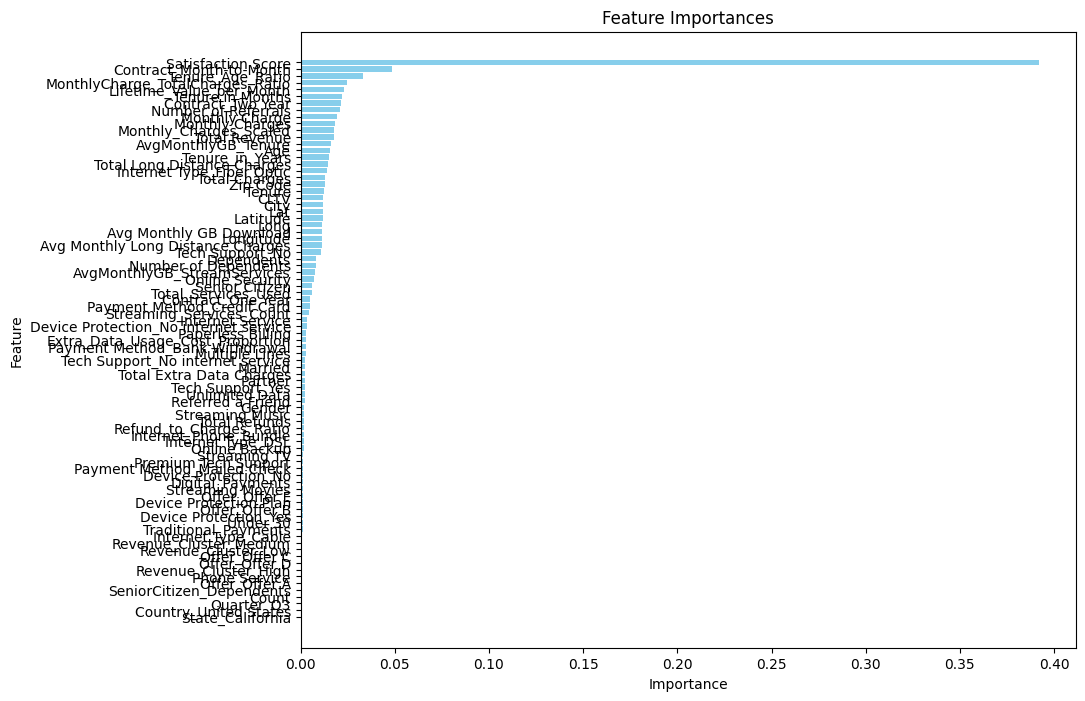

In [35]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances['Feature'], importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()